In [90]:
import control
import matplotlib.pyplot as plt

# Parâmetros do motor

V = 1
J = 2  # Momento de inércia
b = 0.5  # Coeficiente de atrito viscoso
Lf = 1e-3  # Indutância da armadura
Rf = .4  # Resistência da armadura
Ke = 0.0274  # Constante eletromotriz
Kt = 0.0274
Km = 10  # Constante de torque
Td = 0
Va = 1

# Modelo do motor
num = Km
den = [J * Lf, b * Lf + J * Rf, Rf * Ke + Km * Ke]
motor_tf = control.TransferFunction(num, den)

# Plotando a resposta ao degrau do motor
t, y = control.step_response(motor_tf)
plt.plot(t, y)
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (rad/s)')
plt.title('Resposta ao degrau do motor DC')
plt.show()

In [91]:

modelo_eletrico = control.TransferFunction(Km, [Lf, Rf])
modelo_mecanico = control.TransferFunction(1, [J, b])
modelo_eletrico.feedback(modelo_mecanico)
t, y = control.step_response(modelo_mecanico.feedback(modelo_eletrico), T_num=400)
plt.plot(t, y)
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (rad/s)')
plt.title('Resposta ao degrau do motor DC')
plt.show()

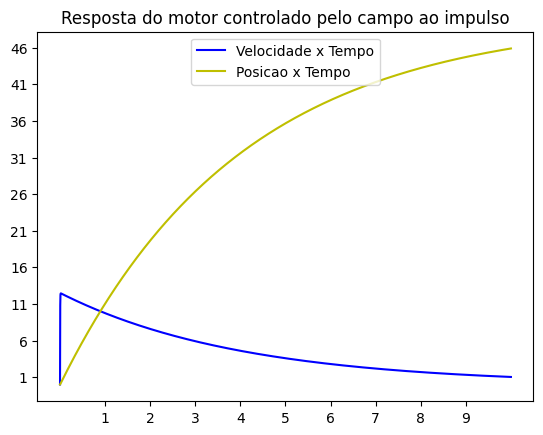

In [92]:
# Parâmetros do motor
Rf = 4  # Resistência da armadura
Lf = 0.25  # Indutância da armadura
Km = 0.05  # Constante de torque
J = 0.02  # Momento de inércia
b = 0.1  # Coeficiente de atrito viscoso

# Modelo do motor
num = Km
den = [(Lf * J), (Rf * J + Lf * b), (Rf * b + Km ** 2)]
motor_tf = control.TransferFunction(num, den)

# Plotando a resposta ao degrau do motor
t, y = control.step_response(motor_tf)
plt.plot(t, y)
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (rad/s)')
plt.title('Resposta ao degrau do motor CC (Com a eq do site)')
plt.show()

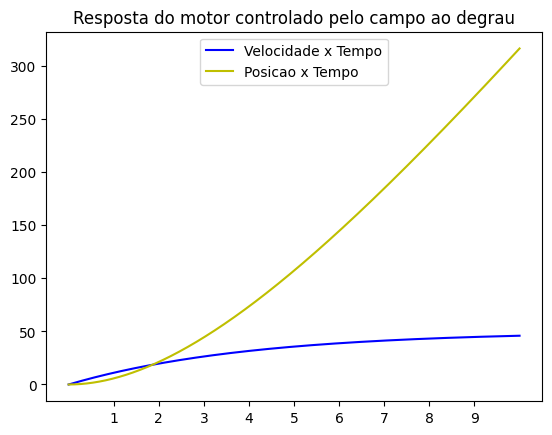

In [93]:
# Com a equação do livro
# Parâmetros do motor
Rf = .4  # Resistência da armadura
Lf = .001  # Indutância da armadura
Km = .05  # Constante de torque
J = 2  # Momento de inércia
b = 0.5  # Coeficiente de atrito viscoso
Kb = .0276
tau = (Rf * J) / (Rf * b + Km * Kb)  # Oq seria o Km???

$$\tau_1 = R_a J / (R_a b + K_b K_m) $$


$$ G(s) = \frac{[K_m/(R_a b+ K_b K_m)]}{s(\tau_1 s + 1)}$$

In [ ]:

# Modelo do motor
num = Km / (Rf * b + Km)
den = [tau, 1, 0]
motor_tf = control.TransferFunction(num, den)

# Plotando a resposta ao degrau do motor
t, y = control.impulse_response(motor_tf)
plt.plot(t, y)
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (rad/s)')
plt.title('Resposta ao degrau do motor CC')
plt.show()